In [1]:
import torch 
from torch import nn
from src.model.generator import Generator

In [2]:
gen = Generator()

In [3]:
gen.load_state_dict(torch.load('model_weights.pth'))


<All keys matched successfully>

In [4]:
gen.eval()

Generator(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (residual_blocks): Sequential(
    (0): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, ep

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
from PIL import Image


In [22]:
img = Image.open('image_hr/100.png')

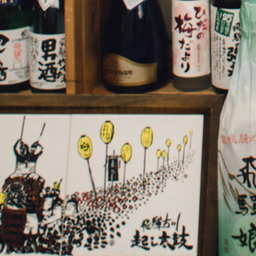

In [8]:
img

In [9]:
img.size

(256, 256)

In [10]:
import numpy as np 

In [11]:
img = np.array(img)
img.shape

(256, 256, 3)

In [16]:
from torchvision.transforms import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

img = transform(img)
img.shape

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [13]:
img = torch.unsqueeze(img,0)
img.shape

torch.Size([1, 3, 256, 256])

In [14]:
out_img = gen(img)

In [15]:
out_img.shape

torch.Size([1, 3, 1024, 1024])

In [20]:
from torchvision.transforms.functional import to_pil_image


out = torch.squeeze(out_img,0)
out.shape


torch.Size([3, 1024, 1024])

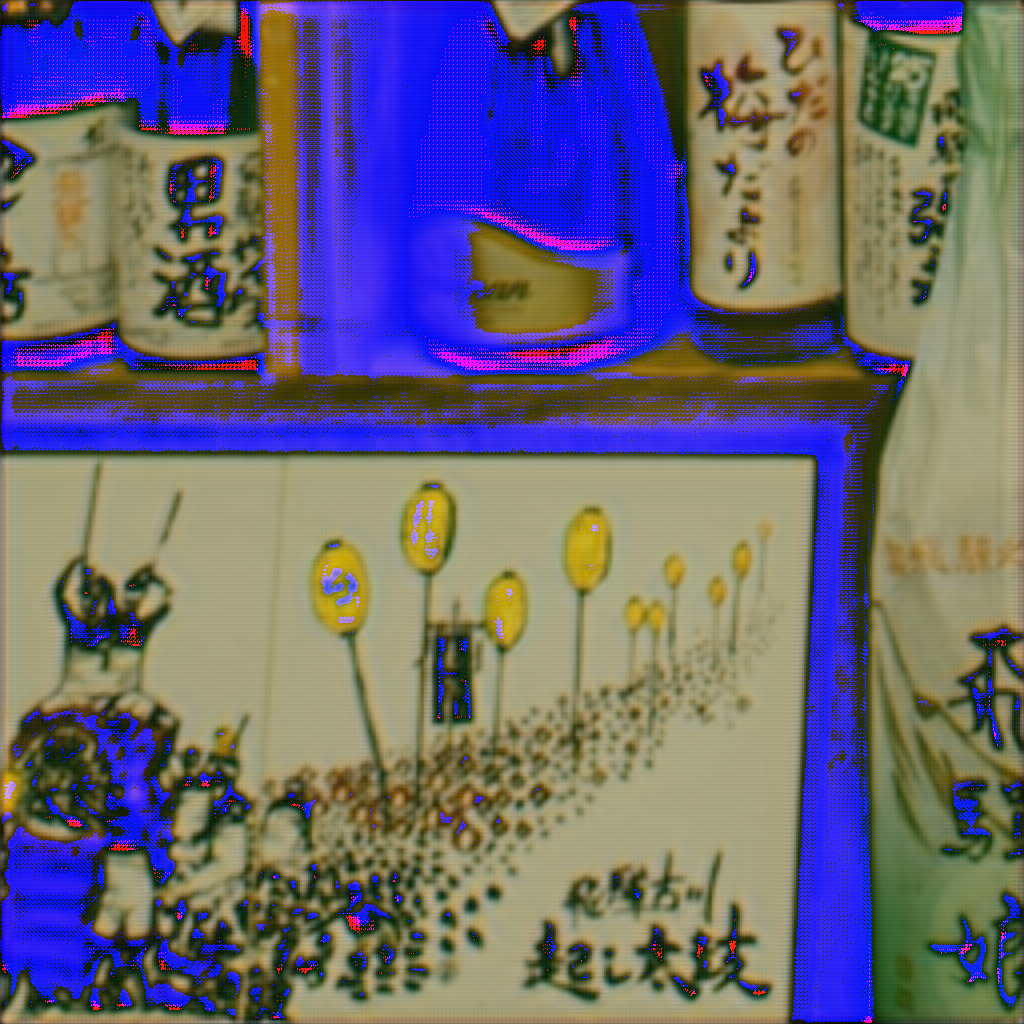

In [21]:
to_pil_image(out)

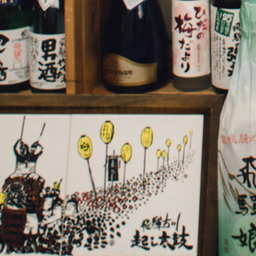

In [23]:
img